In [42]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [43]:
# Importing the dataset
dataset = pd.read_csv('/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
dataset = dataset.drop('Id',axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


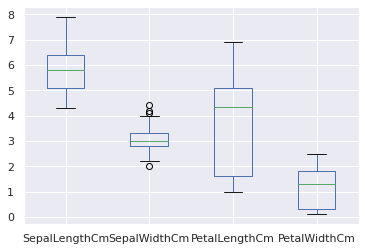

In [46]:
dataset.plot(kind='box', sharex=False, sharey=False)

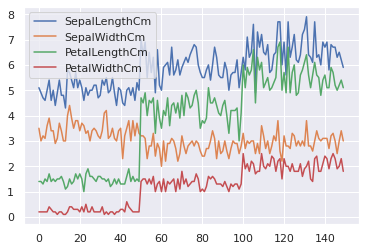

In [47]:
dataset.plot(kind='line', sharex=False, sharey=False)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
from sklearn.preprocessing import LabelEncoder

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

species_encoder = LabelEncoder()
y = species_encoder.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [81]:
print(X_train)


[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.9 4.

In [51]:
print(y_train)

[1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0
 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1
 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [52]:
from sklearn.svm import SVC

svcClassifier = SVC()
svcClassifier.fit(X_train , y_train)
y_pred  = svcClassifier.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test , y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


In [53]:
from sklearn.metrics import accuracy_score
print('accuracy is', accuracy_score(y_pred , y_test))

accuracy is 0.9333333333333333


In [58]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(y_pred , y_test)
RMSE = math.sqrt(MSE)
print(RMSE)

0.2581988897471611


In [72]:
gamma = SVC( kernel = 'rbf' ,random_state=1 , gamma = 0.008 , C = 1)
gamma.fit(X_train , y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.008, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
from sklearn.metrics import accuracy_score
classifier_predictions = gamma.predict(X_test)
print(accuracy_score(y_test , classifier_predictions)*100)

86.66666666666667


In [74]:
# importing grid search from Scikit Learn
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1,1,10,100] , 'gamma' : [1,0.1,0.01,0.001] , 'kernel' : ['rbf']} 

In [75]:
grid = GridSearchCV(SVC(),param_grid,refit = True , verbose = 2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [76]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [77]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [78]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train , y_train)

y_predk = classifier.predict(X_test)


In [79]:
# Coda of the predicitions made by KNN Classifier
print(classification_report(y_test , y_predk))
print(confusion_matrix(y_test , y_predk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


In [80]:
from sklearn.metrics import accuracy_score
print('accuracy :' , accuracy_score(y_predk , y_test))

accuracy : 0.9666666666666667


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 8)

from pprint import pprint
 
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [87]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(X) for X in np.linspace(start = 200 , stop = 2000 , num =100)]
max_features = ['auto' , 'sqrt']
max_depth = [int(X) for X in np.linspace(10 ,110 ,num = 11) ]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True , False]


In [89]:
# creating random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split
               ,'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,
                  218,
                  236,
                  254,
                  272,
                  290,
                  309,
                  327,
                  345,
                  363,
                  381,
                  400,
                  418,
                  436,
                  454,
                  472,
                  490,
                  509,
                  527,
                  545,
                  563,
                  581,
                  600,
                  618,
                  636,
                  654,
                  672,
                  690,
                  709,
                  727,
                  745,
                  763,
                  781,
                  800,
                  81

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator= rf , param_distributions=random_grid , n_iter=100 , cv = 3 , verbose = 2 , random_state = 8 , n_jobs= -1)

rf_random.fit(X  ,  y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.8s


In [ ]:
rf_random.best_params_

In [ ]:
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))